In [49]:
import os
import sys
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


from pylab import rcParams
# import matplotlib.animation as animation
# from matplotlib import rc

# configuration for graphics and random seed

%matplotlib inline

# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 7, 7

In [41]:
NOTEBOOK_DIR = os.path.dirname(os.path.realpath("__file__"))
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)

sys.path.append(PROJECT_ROOT) # make my_module available to import

# Importing my python module utils
from emotion_detection_system.processing_results.information_from_results import *

In [42]:
def does_it_pass_t_test(values_1, values_2,tolerance=0.05):
    _, pvalue = stats.ttest_ind(values_1, values_2)
    if pvalue <= tolerance:
        return True
    else:
        return False

In [51]:
BASELINE_DATA['data_experiment_config'] = 'SVM_BL'
oversampling_data_results['data_experiment_config'] = 'SVM_OS'
nn_bl_data_results['data_experiment_config'] = 'NN_BL'
nn_oversampling_data_results['data_experiment_config'] = 'NN_OS'
current_data = pd.concat([BASELINE_DATA, oversampling_data_results, nn_bl_data_results, nn_oversampling_data_results])
current_data.head()

,Data_Included_Slug,Participant,Session,Scenario,Annotation_Type,Accuracy,Accuracy_Balanced,Precision_Blue,Precision_Green,Precision_Red,Precision_Yellow,Recall_Blue,Recall_Green,Recall_Red,Recall_Yellow,F1score_Blue,F1score_Green,F1score_Red,F1score_Yellow,data_experiment_config
0,session_03_02_va_early_fusion,NaN,Session_03_02,va_early_fusion,parents,0.7030,0.5978,0.6902,0.7288,0.5000,0.6630,0.5799,0.8607,0.3750,0.5755,0.6303,0.7893,0.4286,0.6162,SVM_BL
1,participant_01_va_late_fusion,Participant_01,NaN,va_late_fusion,parents,0.7134,0.4562,0.7115,0.7126,0.6250,0.8000,0.5714,0.9225,0.1282,0.2025,0.6338,0.8041,0.2128,0.3232,SVM_BL
2,all_data_va_late_fusion,All data,NaN,va_late_fusion,parents,0.6508,0.4432,0.7255,0.6368,0.6512,0.7000,0.4018,0.9559,0.2658,0.1491,0.5172,0.7644,0.3775,0.2458,SVM_BL
3,participant_02_va_late_fusion,Participant_02,NaN,va_late_fusion,parents,0.6478,0.5171,0.7423,0.6421,0.5816,0.6168,0.4768,0.9347,0.3851,0.2718,0.5806,0.7613,0.4634,0.3773,SVM_BL
4,session_01_01_a,NaN,Session_01_01,a,parents,0.5543,0.2790,0.4041,0.5926,0.0000,0.0000,0.2476,0.8682,0.0000,0.0000,0.3071,0.7044,0.0000,0.0000,SVM_BL


Text(0, 0.5, 'Accuracy')

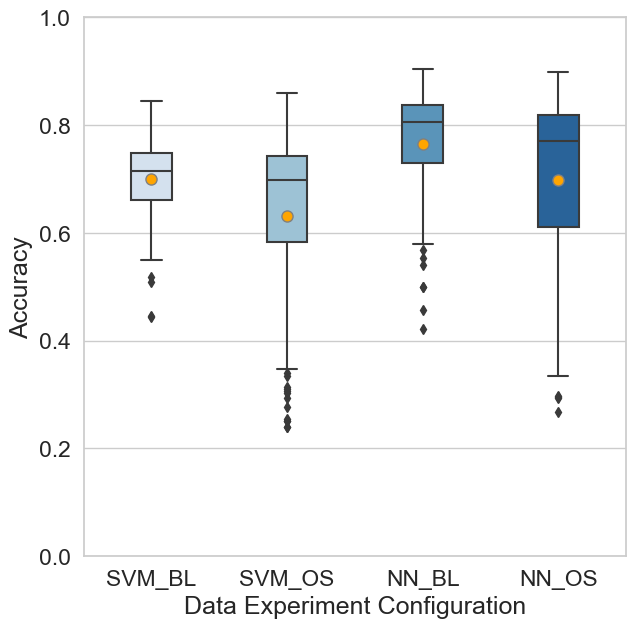

In [73]:
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="Accuracy",
                 width=0.3, palette='Blues', showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'grey',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Balanced Accuracy')

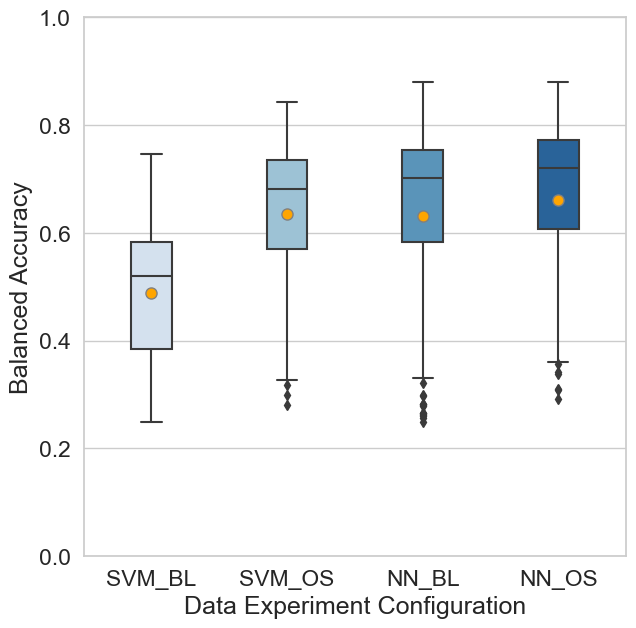

In [72]:
ax = sns.boxplot(data=current_data, x="data_experiment_config", y="Accuracy_Balanced", 
                 width=0.3, palette='Blues',  showmeans=True, 
                 meanprops={'marker':'o',
                       'markerfacecolor':'orange', 
                       'markeredgecolor':'grey',
                       'markersize':'8'})
ax.set(ylim=(0,1))
ax.set_xlabel('Data Experiment Configuration')
ax.set_ylabel('Balanced Accuracy')